# Cheating on your math homework with SymPy

![Sympy Logo](http://localhost:8888/files/images/sympy-small.svg)

http://www.sympy.org

https://github.com/jocassid/Talks

Let's start with a basic question

What is (x+2)<sup>2</sup>?

A programmer might answer: Well I can build a function that takes in a value for x and spits out the value

In [1]:
# The programmer's answer
def expr(x):
    return (x+2)**2

expr(5)

49

A mathematician might say: "Well I can do that multiplication to expand that expression" and write out the expression as

(x+2)(x+2)

Before doing the usual first, outside, inside, last multiplications and arriving at

x<sup>2</sup>+4x+4

What we see in these two examples is the difference between the kind of math we typically have in our programs and the ability to perform operations on symbols.

Computer Algebra System (CAS)

A system which allows a computer to perform mathematical operations on symbols.

Other examples of CAS software include:

* Maple https://www.maplesoft.com
* Mathematica http://www.wolfram.com/mathematica 

In [2]:
# Allows output to contain characters such as greek letters, etc.  More on this later
from sympy import init_printing
init_printing()

In [3]:
from sympy import symbols
x = symbols('x')
expr = (x+2)**2
expr

In [4]:
# Sympy doesn't automatically expand expressions (leaves it up to the user)
from sympy import expand
expanded = expand(expr)
expanded

In [5]:
# To reverse the process use factor
from sympy import factor
factor(expanded)

In [6]:
# If I wanted to show my work while factoring the following
expr = x**2 -1*x - 6
expr

I'm going to guess that (x-3) is one of the factors

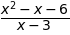

In [7]:
expr / (x-3)

That's not horribly helpful let's try running that through simply

In [8]:
from sympy import simplify
simplify(expr / (x-3))

Let's see what happens if I try something that isn't a factor

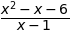

In [9]:
simplify(expr / (x-1))

Let SymPy do the work

In [10]:
factor(expr)

You can build expressions from strings with sym-pify.

In [11]:
from sympy import sympify
sympify('x**2 + sin(y)')

# Warning sym-pify uses eval.  Don't use with un-sanitized inputs!

I'm not sure how helpful sym-pify is.  If you're using it to process input from a webpage you have to deal with sanitizing issues.  It doesn't really help you as a developer since code using SymPy is fairly terse.  Perhaps if you want to store the results of a calculation in a database.

## Basic Operations

Create a new expression to clean up a bit.   Notice how multiple symbols are defined in 1 call to symbols

In [12]:
x, y = symbols('x y')
expr = x**2 + x
expr

substitute y+2 in place of X

In [13]:
expr.subs(x, y+2)

In [14]:
expr.subs(x, 1)

So what about an actual Equation?  Well we can do that with Eq.

In [15]:
from sympy import Eq
x, y = symbols('x y')
eqn = Eq(5, 2*x + 1)

In [16]:
eqn

You can access either side of the equation via the lhs and rhs attributes

In [17]:
lhs = eqn.lhs
lhs

In [18]:
rhs = eqn.rhs
rhs

Please note that rhs and lhs are read-only

In [19]:
try:
    eqn.lhs = eqn.lhs - 1
except AttributeError as ae:
    print(ae)

can't set attribute


In [20]:
from sympy import solveset
solveset(eqn, x)

sympy can also be used to solve a system of equations for instance

Solve the following equations for x and y: x + y = 6 and -3x + y = 2

1. &nbsp;&nbsp;x = 6 - y
2. &nbsp;&nbsp;-3(6 - y) + y = 2
3. &nbsp;&nbsp;-18 + 3y + y = 2
4. &nbsp;&nbsp;4y = 20
5. &nbsp;&nbsp;y = 5
6. &nbsp;&nbsp;x = 6 - 5 = 1

In [21]:
from sympy import linsolve
eqn1 = Eq(x + y , 6)
eqn2 = Eq(-3*x + y, 2)
linsolve([eqn1, eqn2], (x, y)) 

You can use greek letters for symbols.  Capitalize the first character of the name for the capital letter.

In [22]:
symbols('alpha Alpha beta Beta gamma Gamma')

You're not just limited to single character symbols.  Note how the underscore creates a subscripted symbol.

In [23]:
symbols('name quest favorite_color airspeed')

## "I also dabble in  precision" 

*-Rick Sanchez*

Since we're operating symbolically we can manipulate expressions without rounding due to floating point.  There's a few things to note about the expression:

* How the square root of 8 is displayed
* How to create a rational number and how it automatically converted 4/52 to 1/13
* How the terms in the expression aren't in the same order as they are defined

In [98]:
from sympy import sqrt, exp, pi, Rational
expr = sqrt(8) + sqrt(5) + exp(2) + pi + Rational(4, 52)
expr

evalf will give you the floating point value of the expression, rounded to 15 decimal places

In [25]:
expr.evalf()

Pass a value to specify how many decimal places you want.

In [26]:
expr.evalf(50)

## Printing

init_printing will enable the best printer available in the environment.
- iPython/Jupyter Notebook Uses Latex rendered by MathJax by default.
- From the command line unicode characters will be used if supported

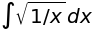

In [27]:
from sympy import latex, Integral
expr = Integral(sqrt(1/x), x)
expr

Latex is a typesetting language that has been used for math formulas for decades.

In [28]:
print(latex(expr))

\int \sqrt{\frac{1}{x}}\, dx


In [29]:
# str() just spits out the expression as it's coded
x = symbols('x')
str(expr)



'Integral(sqrt(1/x), x)'

srepr provides a string describing how the expression is modeled in sympy

In [30]:
# If you're stuck in a plain text world
from sympy import pprint
pprint(Integral(sqrt(1/x), x), use_unicode=False) # the ASCII form

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [31]:
pprint(Integral(sqrt(1/x), x)) # the Unicode form

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


Sympy can also output expressions as MathML which is a W3C XML grammer for mathematics.  There's 2 flavors of MathML markup:

1. Presentation markup: Describes how expressions should appear.  This is how you can embed mathematical expressions in a webpage
2. Content markup: Describes the structure of the expression

Unfortunately SymPy just outputs content markup.

In [32]:
from sympy.printing.mathml import print_mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



## Simplification

simplify can handle trignonometric expressions, etc. 

In [33]:
from sympy import sin, cos 
simplify(sin(x)**2 + cos(x)**2)

Consider an expression with terms like x and x squared scattered around

In [34]:
x, y, z = symbols('x y z')
expr = x*y + x - 3 + 2*x**2 + 2*x**3- z*x**2 + x**3
expr

collect will group similar terms together

In [35]:
from sympy import collect
collect(expr, x)

Cancel will remove terms witch cancel each other out.

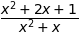

In [36]:
expr = (x**2 + 2*x + 1)/(x**2 + x)
expr

Keep in mind this expression is:

(x + 1)(x + 1) / x(x + 1)

In [37]:
from sympy import cancel
cancel(expr)

## Matrices

Creating a matrix is simple.  Import Matrix and pass it a list of lists (for a 2D array)

In [82]:
from sympy import Matrix 
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

Use the shape attribute to get the shape of the matrix.  In the standard rows x columns terminology

In [83]:
M.shape

N x 1 column matrices can be created by passing a single list of values.

In [84]:
N = Matrix([1, 2, 3])
N

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Cooincidentally, the numpy.array function takes arguments in a similar fashion to Matrix.  SymPy can be used to work out a formula before coding it in numpy.

In [85]:
import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3])
print(A, '\n\n', B)

[[1 2 3]
 [4 5 6]] 

 [1 2 3]


Multiplying by a scalar is easy.

In [86]:
N * 2

⎡2⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣6⎦

To build expressions and equations with matrices, create symbols using MatrixSymbol.

In [87]:
from sympy import MatrixSymbol
Ms = MatrixSymbol('M', 2, 3)
Ns = MatrixSymbol('N', 3, 1)
Ps = MatrixSymbol('P', 3, 1)
eqn = Eq(2 * Ns, Ps)
eqn

In [88]:
eqn.subs([(Ns, N), (Ps, 2 * N)])

  ⎡1⎤   ⎡2⎤
  ⎢ ⎥   ⎢ ⎥
2⋅⎢2⎥ = ⎢4⎥
  ⎢ ⎥   ⎢ ⎥
  ⎣3⎦   ⎣6⎦

Multiplying matrices is also easy.  Displaying a pretty equation takes a bit of work.

In [95]:
# The product of a (2,3) matrix times a (3,1) matrix is a (2,1) matrix
Ps = MatrixSymbol('P', 2, 1)
Eq(Ms * Ns, Ps).subs([(Ms, M), (Ns, N), (Ps, M*N)])

          ⎡1⎤       
⎡1  2  3⎤ ⎢ ⎥   ⎡14⎤
⎢       ⎥⋅⎢2⎥ = ⎢  ⎥
⎣4  5  6⎦ ⎢ ⎥   ⎣32⎦
          ⎣3⎦       

Multiplying matrices in numpy is done with the dot method.

In [97]:
print(A.dot(B))

[14 32]


Likewise adding two matrices.

In [45]:
As, A = MatrixSymbol('A', 3, 1), Matrix([1, 2, 3])
Bs, B = MatrixSymbol('B', 3, 1), Matrix([3, 2, 1])
Cs = MatrixSymbol('C', 3, 1)
eqn = Eq(As + Bs, Cs)
eqn.subs([(As, A), (Bs, B), (Cs, A + B)])

⎡1⎤   ⎡3⎤   ⎡4⎤
⎢ ⎥   ⎢ ⎥   ⎢ ⎥
⎢2⎥ + ⎢2⎥ = ⎢4⎥
⎢ ⎥   ⎢ ⎥   ⎢ ⎥
⎣3⎦   ⎣1⎦   ⎣4⎦

sympy will raise an exception if the shapes of the matrices aren't compatible

In [46]:
from sympy.matrices import ShapeError
try:
    N * M
except ShapeError as se:
    print(se)

Matrix size mismatch: (3, 1) * (2, 3).


Use row and col methods to access rows and columns.  You can use negative indexes.

In [47]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
pprint(M)
print("\n{}".format(M.row(0)))
print(M.row(-1))
print("\n{}".format(M.col(1)))

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

Matrix([[1, 2, 3]])
Matrix([[4, 5, 6]])

Matrix([[2], [5]])


There's several different way to index a matrix.  Numbering runs top to bottom left to right.  Row, Column is available as is slicing.  If the slice is 2D you'll get a matrix back.

In [48]:
pprint(M)
print("\n{}".format(M[5]))
print("\n{}".format(M[0:3])) # returns a list
print("\n{}\n".format(M[0,1]))
pprint(M[0:2, 0:2]) # returns a matrix

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

6

[1, 2, 3]

2

⎡1  2⎤
⎢    ⎥
⎣4  5⎦


**Programmer vs. Mathematician caveat**

To access the top left element of $\left[\begin{matrix}1 & 2 & 3\\4 & 5 & 6\end{matrix}\right]$ use `M[0,0]` however mathematical notation refers to the same a element as M<sub>1,1</sub>

columns may be removed with col_del.  Rows may be removed with row_del.  Be careful we these when rerunning cells in Jupyter notebook.  That's why I'm recreating the matrix in the following cells

In [49]:
M = Matrix([[1, 2, 3], [4, 5, 6]]) # reset M to original matrix
M.col_del(1)
M

⎡1  3⎤
⎢    ⎥
⎣4  6⎦

In [50]:
M = Matrix([[1, 2, 3], [4, 5, 6]]) # reset M to original matrix
M.row_del(0)
M

[4  5  6]

row_insert and col_insert allows you to add columns or rows.  Note how we need use a list of lists to specify a 1 x 3 matrix.  The first argument is the index where the row is inserted at

In [51]:
M = Matrix([[1, 2, 3], [4, 5, 6]]) # reset M to original matrix
N = M.row_insert(1, Matrix([[8, 10, 12]]))
N

⎡1  2   3 ⎤
⎢         ⎥
⎢8  10  12⎥
⎢         ⎥
⎣4  5   6 ⎦

Note that .row_insert and .col_insert return a new Matrix.  They don't alter the original Matrix

In [52]:
M

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In this example we insert a column at index 3.  The current matrix has 3 columns so the index of the rightmost column is 2.

In [53]:
N = N.col_insert(3, Matrix([4, 14, 8]))
N

⎡1  2   3   4 ⎤
⎢             ⎥
⎢8  10  12  14⎥
⎢             ⎥
⎣4  5   6   8 ⎦

eye can be used to create a square matrix of specified size.  For a recap: Identity matrix times a matrix yields the original matrix

In [54]:
from sympy import eye
Ms = MatrixSymbol('M', 2, 3)
Is, I = MatrixSymbol('I', 3, 3), eye(3)
Ps = MatrixSymbol('P', 2, 3)
eqn = Eq(Ms * Is, Ps)
eqn.subs([(Ms, M), (Is, I), (Ps, M * I)])

          ⎡1  0  0⎤            
⎡1  2  3⎤ ⎢       ⎥   ⎡1  2  3⎤
⎢       ⎥⋅⎢0  1  0⎥ = ⎢       ⎥
⎣4  5  6⎦ ⎢       ⎥   ⎣4  5  6⎦
          ⎣0  0  1⎦            

In [55]:
from sympy import zeros
zeros(3, 4)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [56]:
from sympy import ones
ones(4, 3)

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

Get the transposed version of a Matrix by using its T attribute.  This does not alter the original Matrix

In [57]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
pprint(M)
N = M.T
print()
pprint(N)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦


The inverse of a square matrix can be found using the .inv method.  Note: there are matrices that cannot be inverted.  Such matrices are called singular or degenerate matrices.

In [58]:
Ms, Ns, Os = (MatrixSymbol('M', 2, 2), MatrixSymbol('N', 2, 2), MatrixSymbol('O', 2, 2))
M = Matrix([[1, 2], [3, 4]])
N = M.inv()
Eq(Ms * Ns, Os).subs([(Ms, M), (Ns, N), (Os, M*N)])


⎡1  2⎤ ⎡-2    1  ⎤   ⎡1  0⎤
⎢    ⎥⋅⎢         ⎥ = ⎢    ⎥
⎣3  4⎦ ⎣3/2  -1/2⎦   ⎣0  1⎦

## Calculus

Sympy can do Calculus and a lot of math I either don't understand or have forgotten. One of the basic elements in calculus is a function. A simple function describes a path on a 2-D grid you feed an x coordinate into the function and the function yields the y coordinate.  A limit asks the question of as x approaches a specific value what does y approach?

So here we define a function and plot it using SymPy's matplotlib integration.  Due to the nature of this function I had to specify the limits for x and y in the plot.

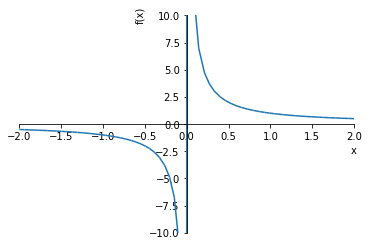

In [59]:
%matplotlib inline
from sympy.plotting import plot
x = symbols('x')
function = 1/x
plot(function, (x, -2, 2), ylim=(-10, 10))

So let's take the limit of this function as x approaches 0

In [60]:
from sympy import limit
limit(function, x, 0)

Well, that's correct, but only if we're approaching zero from the right (postive) side.  Let's make the direction from which we approach zero explicit.

In [61]:
limit(function, x, 0, '-')

A common question with limits is to find the limit of a function as x approaches Infinity (positive or negative).  The constant for infinity is two lowercase o's

In [62]:
from sympy import oo
limit(function, x, oo)

Here's the limit as x approches negative infinity

In [63]:
limit(function, x, -1*oo)

In calculus, the derivative of function is second function which provides the slope of the first function at any point on the x axis.  The diff function will generate the derivative.

In [64]:
from sympy import diff
x = symbols('x')
function = x**2
derivative = diff(function)
pprint(function)
print()
pprint(derivative)

 2
x 

2⋅x


Alternately you can use the diff method of an expression.

In [65]:
(x**2).diff()

In this plot we can see that the derivative (The straight line).  Crosses our original function at the lowest point of the curve where the slope is zero.

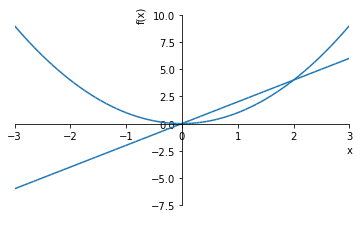

In [66]:
plot(function, derivative, (x, -3, 3), ylim=(-10, 10))

## Caveats

The name of the symbol has nothing to do with the variable it's assigned to. So don't cross your wires like this.

In [67]:
a, b = symbols('b a')
print('a is', a)
print('b is', b)

a is b
b is a


### SymPy is NOT Numpy!

Keep your 1000 x 1000 matrices to yourself!